Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')



── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.0      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [ ]:
# diabetes = readr::read_csv('diabetes.csv')
# diabetes |> head()

In [3]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [6]:
diabetes_train |> glimpse()

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 10, 1, 3, 8, 1, 13, 5, 3, 6, …
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 139, 103, 126, 99, 97,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 80, 30, 88, 84, 66, 82, 92…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 0, 38, 41, 0, 15, 19, 0, 11,…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 0, 83, 235, 0, 140, 110, 0, 5…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 39.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 1.441, 0.1…
$ Age                      <dbl> 31, 21, 30, 29, 30, 57, 33, 27, 50, 22, 57, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

A categrical variable that will be encoded to a dummy variable 0 and 1

❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | To express the Glucose level in blood            |
| BMI         |To express the Body mass index             |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

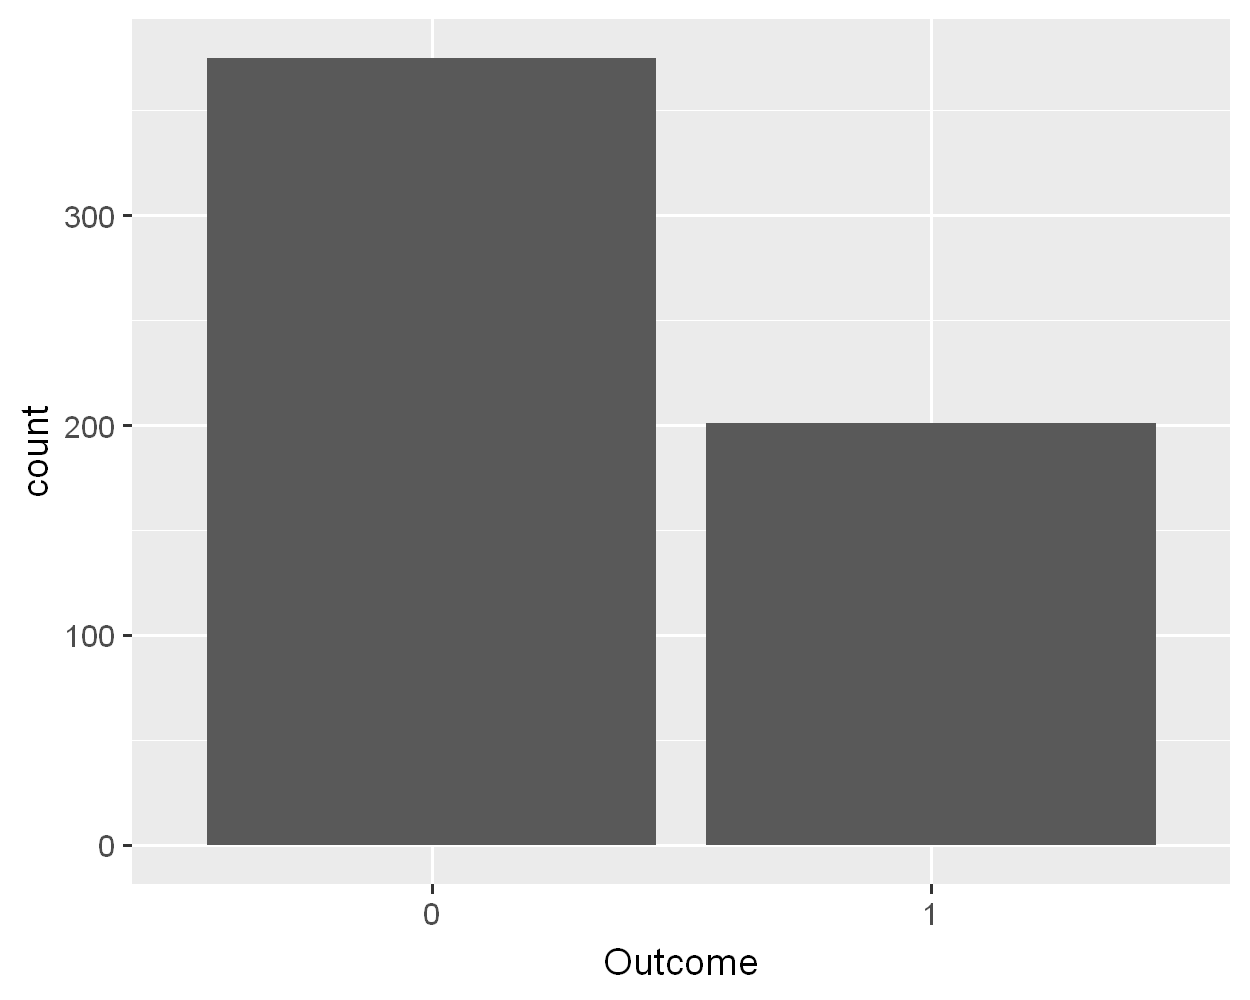

In [13]:
diabetes_train |>
ggplot(aes(x = Outcome)) + 
    geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, it is not balanced. The frequency of "class 0" is considerably higher than "class 1". 



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [18]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

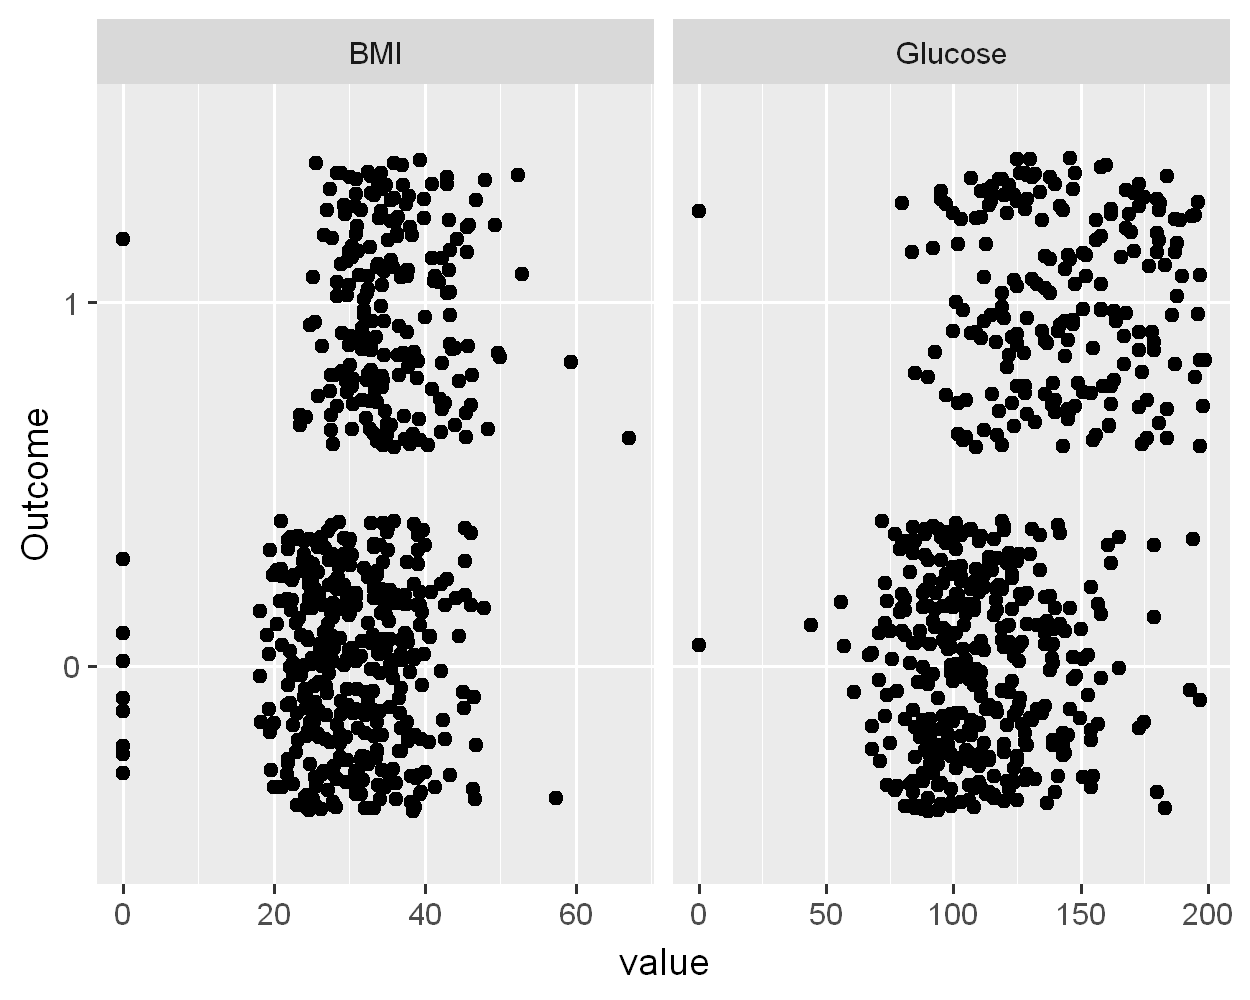

In [21]:
plot_df |>
ggplot(aes(x = value, y = Outcome)) + 
       geom_jitter() +
       facet_wrap(~name, ncol = 2, scales = 'free_x')



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

When scales = 'free_x' is removed, the x axis limit will be the same for both panels (0-200). Since the BMI range is 0-65, this plot will not be properly visualized. 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [25]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ Glucose + BMI, data = diabetes_train)

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [28]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [31]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 109  38
         1  16  29

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

- 67
- 29
- 16